In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [2]:

house_prices_df = pd.read_csv(r"H:\Sandeep\DATA SCIENCE\MY Files\pp-2021.csv",usecols=[1,3,4,5],names=["price","postcode","type","new"])
                              
house_prices_df.head()


,price,postcode,type,new
0,230000,CO13 0PQ,D,N
1,700000,IG10 4BS,T,N
2,625000,EN9 1LH,S,N
3,360000,SS9 3AU,S,N
4,345000,SS15 6BG,S,N


In [3]:
postcodes_df = pd.read_csv(r"H:\Sandeep\DATA SCIENCE\MY Files\ukpostcodes\ukpostcodes.csv",usecols=[1,2,3])
postcodes_df.head()


,postcode,latitude,longitude
0,AB10 1XG,57.144156,-2.114864
1,AB10 6RN,57.137871,-2.121487
2,AB10 7JB,57.124274,-2.127206
3,AB11 5QN,57.142701,-2.093295
4,AB11 6UL,57.137468,-2.112455


In [4]:
df=house_prices_df.merge(postcodes_df,how="inner",left_on="postcode",right_on="postcode")
df["price"]=df["price"]/1000
df.head()

,price,postcode,type,new,latitude,longitude
0,230.0,CO13 0PQ,D,N,51.843109,1.234529
1,700.0,IG10 4BS,T,N,51.647951,0.051911
2,605.0,IG10 4BS,T,N,51.647951,0.051911
3,565.0,IG10 4BS,T,N,51.647951,0.051911
4,625.0,EN9 1LH,S,N,51.690294,0.011013


In [5]:
df['price'].describe()

count    1.256792e+06
mean     3.826518e+02
std      1.389561e+03
min      1.000000e-03
25%      1.725000e+02
50%      2.699950e+02
75%      4.125000e+02
max      4.141087e+05
Name: price, dtype: float64

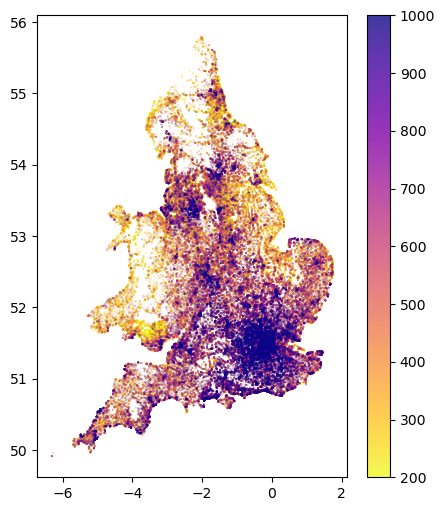

In [6]:
def visualise(df, vmin, vmax):
    
    df_sorted = df.sort_values(by='price')
    x = df_sorted['longitude']
    y = df_sorted['latitude']
    c = df_sorted['price'] 

    plt.rcParams['figure.figsize'] = [5, 6]
    plt.rcParams['figure.dpi'] = 100 

    plt.scatter(x, y, s=0.01, c=c, cmap='plasma_r',norm=colors.Normalize(vmin=vmin,vmax=vmax), alpha=0.8)
    plt.colorbar()
    plt.show()
    
visualise(df, 200, 1000)

In [7]:
df_sorted = df.sort_values(by='price')
df_sorted

,price,postcode,type,new,latitude,longitude
338798,0.001,SN4 0FJ,T,N,51.510958,-1.767784
853886,0.100,NE61 2PP,O,N,55.163940,-1.685665
1255907,0.100,TF2 8DH,O,N,52.725673,-2.432152
213698,0.100,KT11 1EF,O,N,51.335316,-0.451901
1216450,0.100,HA4 7DW,O,N,51.569587,-0.437875
...,...,...,...,...,...,...
810501,181500.000,EC1V 9BW,O,N,51.525032,-0.091296
506408,185000.000,E1 8QS,O,N,51.514453,-0.072973
802473,292000.000,M3 3AQ,O,N,53.480414,-2.253285
849379,372600.000,EC1Y 8RQ,O,N,51.525016,-0.088715


In [8]:
# Terraced houses only (i.e., Townhouses in the US)
prices_df = df[(df['type'] == 'T')]
# Obtain the average price paid in each postcode
prices_df = prices_df.groupby(["postcode","latitude","longitude"], as_index=False)["price"].mean()
prices_df.head()


,postcode,latitude,longitude,price
0,AL1 1AS,51.749073,-0.335471,608.75
1,AL1 1DQ,51.747408,-0.342340,416.00
2,AL1 1HW,51.747071,-0.336506,505.00
3,AL1 1LN,51.748754,-0.333208,500.00
4,AL1 1NF,51.749499,-0.336918,680.00


In [24]:
df['type'] .unique()

array(['D', 'T', 'S', 'F', 'O'], dtype=object)

# Using k-NN

In [9]:
X = prices_df[['latitude','longitude']]
y = prices_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
X_train.shape

(158351, 2)

In [11]:
X_test.shape

(52784, 2)

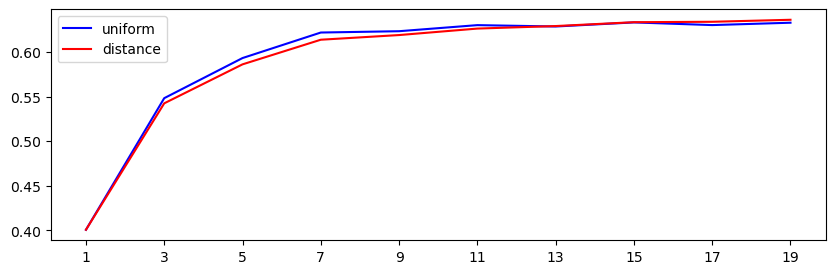

In [12]:
uniform  = []
distance = []
r = range (1,21,2)

for k in r:
    
    # Euclidan, 'straight' distance
    model = KNeighborsRegressor(n_neighbors = k, weights='uniform')
    model.fit(X_train.values, y_train.values)
    uniform.append(model.score(X_test.values,y_test.values))

    # Distance is inversely proportional (to lessen the weight of outliers)
    model = KNeighborsRegressor(n_neighbors = k, weights='distance') 
    model.fit(X_train.values, y_train.values)
    distance.append(model.score(X_test.values,y_test.values))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()


In [13]:
pd.DataFrame({"k" : r, "uniform" : uniform, "distance" : distance})

,k,uniform,distance
0,1,0.400774,0.400774
1,3,0.548193,0.542415
2,5,0.593121,0.586064
3,7,0.621713,0.613658
4,9,0.623191,0.618881
5,11,0.629999,0.626136
6,13,0.628470,0.628963
7,15,0.633039,0.633283
8,17,0.630055,0.633758
9,19,0.632708,0.635995


In [14]:
params = {'n_neighbors':range(1,21,2),'weights':['uniform','distance']}

In [15]:
model = GridSearchCV(KNeighborsRegressor(), params, cv=5)
model.fit(X_train.values,y_train.values)
model.best_params_

{'n_neighbors': 17, 'weights': 'distance'}

In [16]:
model.score(X_test.values,y_test.values)

0.6337578962635382

In [17]:
def price(description,lat,lon):
    features = [[lat,lon]]
    print("{:30s} -> {:5.0f}k ".format(description,float(model.predict(features))))

# Examples
price('Oxford Circus, London', 51.515276, -0.142038)
price('Harrods (B. Road), London', 51.499814, -0.163366)
price('Peak District, National Park', 53.328508, -1.783416)


Oxford Circus, London          ->  4207k 
Harrods (B. Road), London      ->  3853k 
Peak District, National Park   ->   294k 


In [18]:
types_df = df.groupby(["latitude","longitude","type"], as_index=False)["price"].mean()
types_df.head()

,latitude,longitude,type,price
0,49.912327,-6.300134,D,695.0
1,49.912327,-6.300134,T,625.0
2,49.912711,-6.301050,D,625.0
3,49.913412,-6.310742,O,25.5
4,49.913977,-6.309106,D,745.0


In [19]:
params = {'n_neighbors':range(1,21,2),'weights':['uniform','distance']}

X = types_df[['latitude','longitude','price']]
y = types_df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = GridSearchCV(KNeighborsClassifier(), params, cv=5)
model.fit(X_train.values,y_train.values)
model.best_params_


{'n_neighbors': 19, 'weights': 'distance'}

In [20]:
model.score(X_test.values,y_test.values)

0.5328601933134587

In [21]:
ht = { 'F' : 'Flat', 'T' : 'Terraced', 'S' : 'Semi', 'D' : 'Detached', 'O' : 'Other'}

def house_type(description,lat,lon,price):
    features = [[lat,lon,price]]
    print("{:30s} {:5.0f}k -> {}".format(description,price,ht[(model.predict(features)[0])]))

house_type('Oxford Circus, London', 51.515276, -0.142038, 500)
house_type('Harrods (B. Road), London', 51.499814, -0.163366, 5500)
house_type('Peak District, National Park', 53.328508, -1.783416, 100)


Oxford Circus, London            500k -> Flat
Harrods (B. Road), London       5500k -> Other
Peak District, National Park     100k -> Terraced


# Conclusion -
Scikit Learn does a good job at predicting both continuous values, and classes, using KNeighborsRegressor(), and KNeighborsClassifier(), respectively, for a use case in which the key features are geographical coordinates, in which, the notion of ‘distance’ is highly intuitive.

The use of all available Land Registry’s records, (as opposed to only the 2021 data sets) would facilitate the prediction of ‘future prices’, as well as the analysis of novel interesting patterns. For example, flats and terraced houses tend to form clusters in terms of continuous house numbers. An effective prediction on the property type could be achieved based on the house number and location (without the price), without necessarily having a ‘sold’ record for the specific house number/postcode pair.